In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from collections import defaultdict

In [14]:
def plot_results(filename):
    header = []
    with open(filename, newline='') as f:
        reader = csv.reader(f)
        header = next(reader)
        header = [s.strip() for s in header]
        algorithm_idx = header.index("algorithm")
        size_a_idx = header.index("size_a")
        size_b_idx = header.index("size_b")
        elapsed_ms_idx = header.index("elapsed_ms")
        speed_idx = header.index("speed")
        print(header)
        lists = defaultdict(lambda : [])
        for row in reader:
            lists[row[algorithm_idx]].append(
                [float(row[size_a_idx]) * float(row[size_b_idx]), float(row[elapsed_ms_idx]),
                float(row[speed_idx])])
    vectors = dict()
    for k, v in lists.items():
        vectors[k] = np.array(v)
        
    mean_speeds = []
    max_speeds = []
    for k, v in vectors.items():
        xs, ys, speeds = v.T
        #print(ys)
        xs_uq, xs_inverse = np.unique(xs, return_inverse=True)
        ys_uq = np.bincount(xs_inverse, weights=ys) / np.bincount(xs_inverse)
        #print("xs:", np.where(np.isnan(xs)))
        #print("ys:", np.where(np.isnan(ys)))
        #print(ys)
        mean_speed = np.mean(speeds)
        mean_speeds.append((k, mean_speed))
        max_speed = np.max(speeds)
        max_speeds.append((k, max_speed))
        plt.plot(xs_uq, xs_uq/(ys_uq * 1000), label=k)
    
    sorted_mean_speeds = list(sorted(mean_speeds, key = lambda p: p[1]))
    print(*sorted_mean_speeds, sep='\n')
    print("-----")
    print(*list(sorted(max_speeds, key = lambda p: p[1]))[:], sep='\n')
    print("-----")
    return sorted_mean_speeds
    # plt.legend()
    #plt.legend()
    #plt.savefig("speeds.png", dpi=900)

In [ ]:
plot_results("out/tiled_st_gpu_1675793842.2267866.csv")

['algorithm', 'device_type', 'size_a', 'size_b', 'source_a', 'source_b', 'elapsed_ms', 'hash', 'speed']
('tiled_mt_16_2_6_256', 10564.7739353275)
('tiled_mt_16_2_5_256', 10794.11228686)
('tiled_mt_16_2_4_256', 11060.613854487501)
('tiled_mt_16_2_3_256', 11336.926488859997)
('tiled_mt_16_2_2_256', 11417.03767936)
('tiled_mt_16_2_6_128', 12861.2448298725)
('tiled_mt_16_2_5_128', 12995.730000090001)
('tiled_mt_16_2_4_128', 13275.160658667497)
('tiled_mt_16_2_3_128', 13438.434227155)
('tiled_mt_16_2_2_128', 13636.358694810002)
('tiled_mt_16_3_6_256', 14181.587436385002)
('tiled_mt_16_3_5_256', 14386.3126456)
('tiled_mt_16_3_4_256', 14790.1862206175)
('tiled_mt_16_3_2_256', 15296.268387442502)
('tiled_mt_16_3_3_256', 15315.92169185)
('tiled_mt_16_6_5_128', 15623.587214773437)
('tiled_mt_16_4_5_256', 17248.64075965)
('tiled_mt_16_3_6_128', 17371.49467804)
('tiled_mt_16_4_6_256', 17413.2930583825)
('tiled_mt_16_3_5_128', 17574.1713858375)
('tiled_mt_16_4_4_256', 17734.31344614)
('tiled_mt_16_

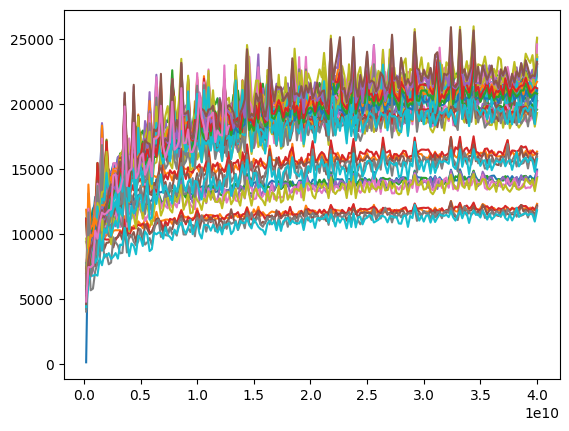

In [16]:
sorted_mean_speeds=plot_results("out/tiled_st_gpu_LARGE.csv")

In [17]:
print(sorted_mean_speeds)

[('tiled_mt_16_2_6_256', 10564.7739353275), ('tiled_mt_16_2_5_256', 10794.11228686), ('tiled_mt_16_2_4_256', 11060.613854487501), ('tiled_mt_16_2_3_256', 11336.926488859997), ('tiled_mt_16_2_2_256', 11417.03767936), ('tiled_mt_16_2_6_128', 12861.2448298725), ('tiled_mt_16_2_5_128', 12995.730000090001), ('tiled_mt_16_2_4_128', 13275.160658667497), ('tiled_mt_16_2_3_128', 13438.434227155), ('tiled_mt_16_2_2_128', 13636.358694810002), ('tiled_mt_16_3_6_256', 14181.587436385002), ('tiled_mt_16_3_5_256', 14386.3126456), ('tiled_mt_16_3_4_256', 14790.1862206175), ('tiled_mt_16_3_2_256', 15296.268387442502), ('tiled_mt_16_3_3_256', 15315.92169185), ('tiled_mt_16_6_5_128', 15623.587214773437), ('tiled_mt_16_4_5_256', 17248.64075965), ('tiled_mt_16_3_6_128', 17371.49467804), ('tiled_mt_16_4_6_256', 17413.2930583825), ('tiled_mt_16_3_5_128', 17574.1713858375), ('tiled_mt_16_4_4_256', 17734.31344614), ('tiled_mt_16_3_4_128', 17959.61311093), ('tiled_mt_16_4_2_256', 18028.6729398075), ('tiled_mt_1

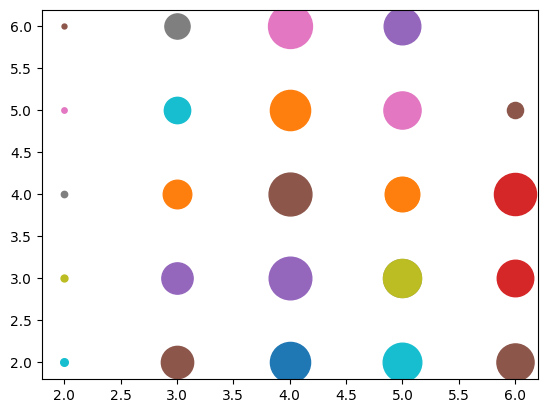

In [42]:
min_speed = sorted_mean_speeds[0][1]
max_speed = sorted_mean_speeds[-1][1]
for k, v in sorted_mean_speeds:
    words = k.split("_")
    x = int(words[3])
    y = int(words[4])
    threads = int(words[5])
    #print(v/100)
    rng_len = max_speed-min_speed
    size = (v - min_speed) / rng_len * 10
    plt.scatter(x, y, s=size**3)
plt.show()